In [7]:
pip install pandas numpy sklearn matplotlib seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [8]:
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install scikit-learn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

pd.set_option('display.max_columns', None)


In [10]:
# Read the dataset
df = pd.read_csv(r'C:\Users\jeanm\OneDrive\Documents\GENAI NOTEBOOKS\datasets\creditcard.csv')

#url = 'https://drive.google.com/file/d/1WVeAnQzmIKevERVjTVDCOfnDoJ81EVW7/view?usp=sharing'
#path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
#df = pd.read_csv(path)


In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
df.isna().sum()
#determine the maximum value of the 'Time' column and determine unit of time (seconds) or period of dataset
df['Time'].max()

np.float64(172792.0)

In [15]:
print (f'minutes over a day = {24*60}')
print (f'seconds over a day = {24*60*60}')
print (f'miliseconds over a day = {24*60*60*1000}')
#minutes of a week (7 days) 
print (f'minutes over a week = {7*24*60}')
print (f'seconds over a week = {7*24*60 *60}')
print(f'we consider that time is in seconds and the dataset is over 2 days - 48 hours, where the maximum possible is 48*60*60 = 172800 seconds')

minutes over a day = 1440
seconds over a day = 86400
miliseconds over a day = 86400000
minutes over a week = 10080
seconds over a week = 604800
we consider that time is in seconds and the dataset is over 2 days - 48 hours, where the maximum possible is 48*60*60 = 172800 seconds


In [16]:
#check the distribution of the target variable 'Class'
df['Class'].value_counts()
#%%
df['Class'].value_counts(normalize=True) * 100


Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

The dataset contains 31 columns,
The target variable 'Class' - by default, is binary (0 for non-fraudulent transactions and 1 for fraudulent transactions).
The dataset contains no missing values.
The distribution of the target variable 'Class' is extremely unbalanced (99.83% of the data is non-fraudulent).

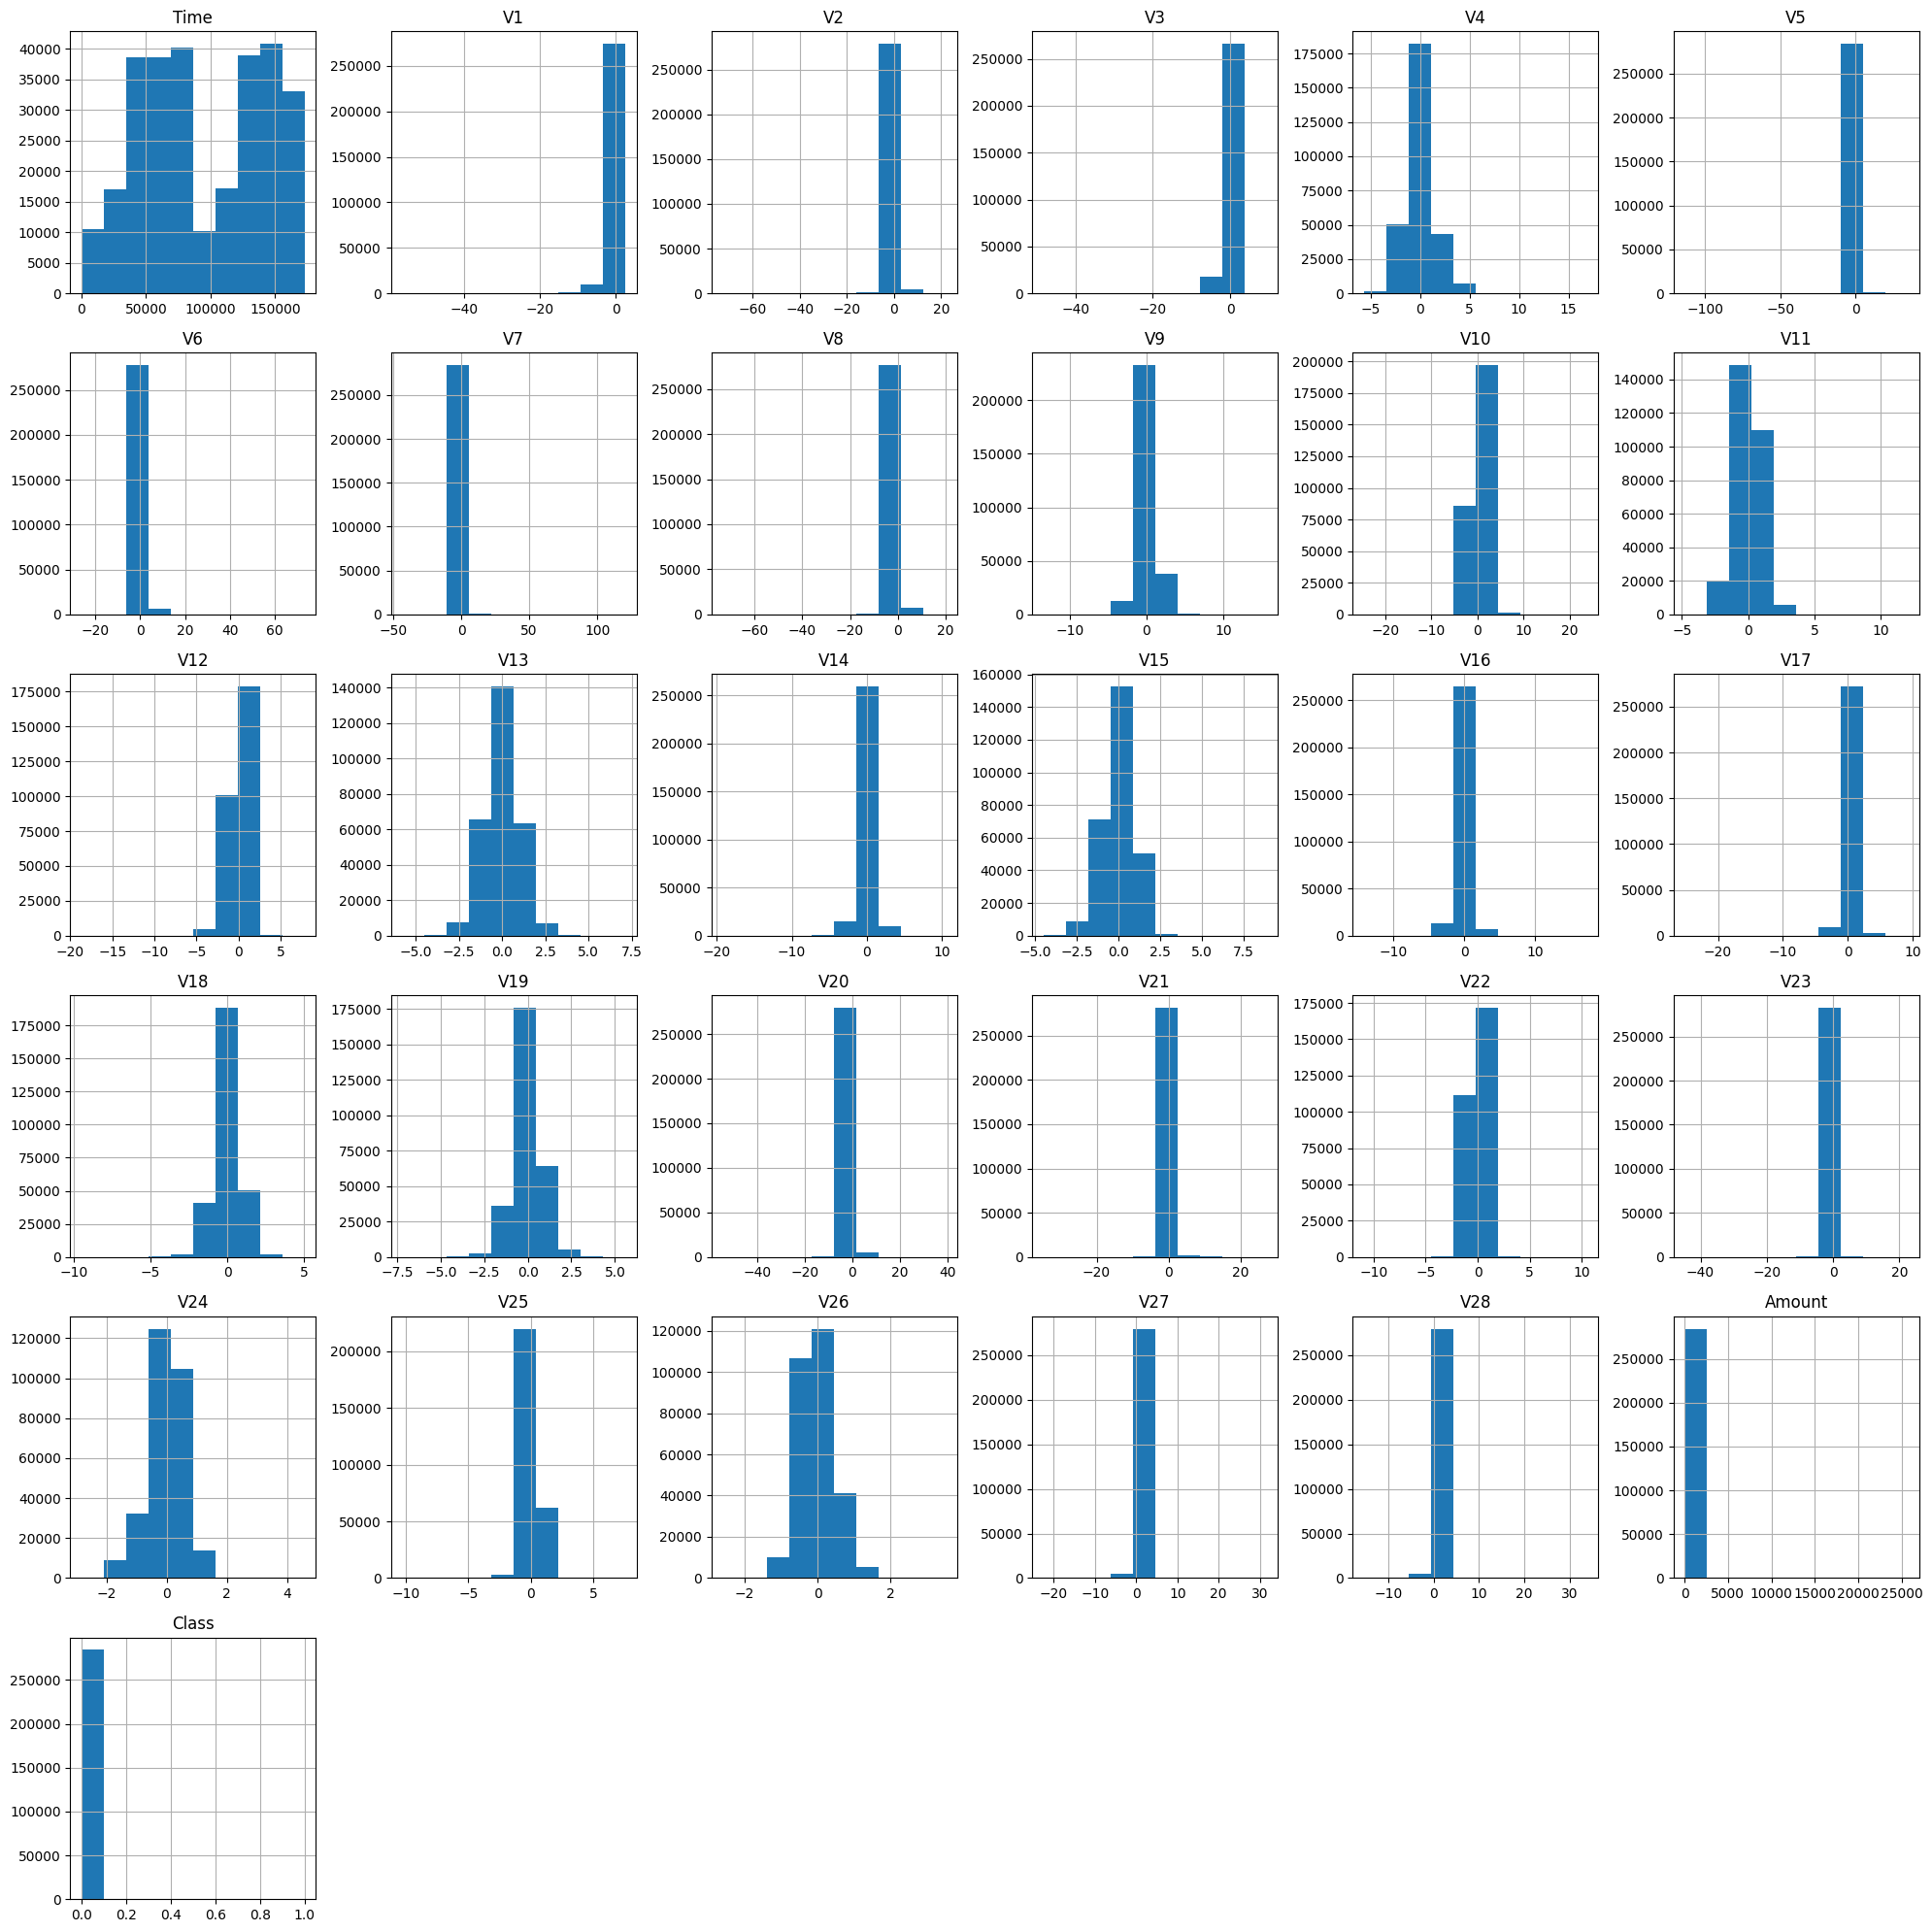

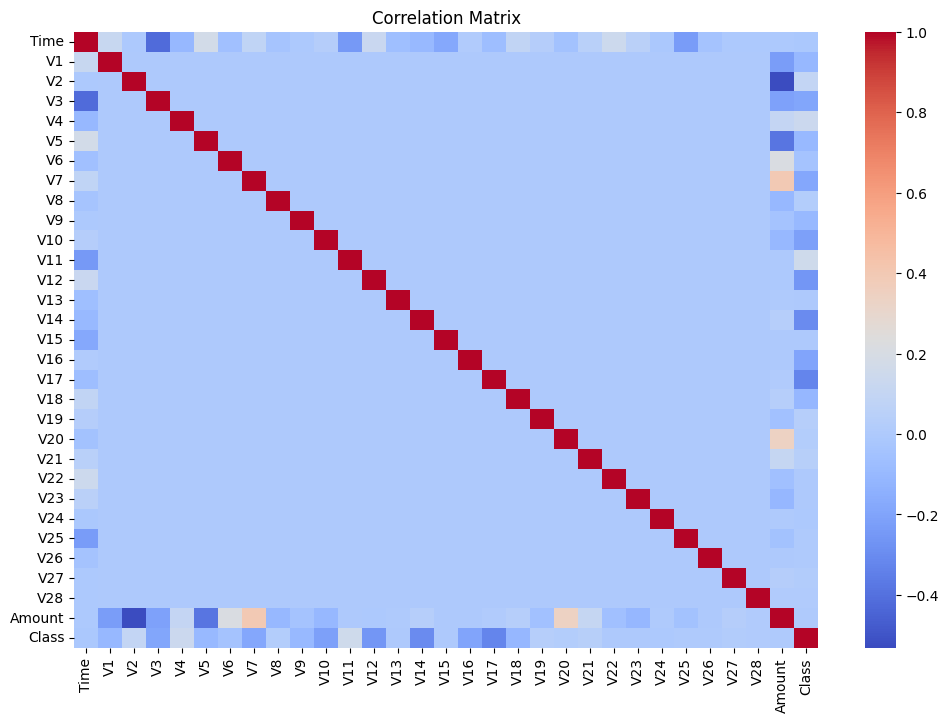

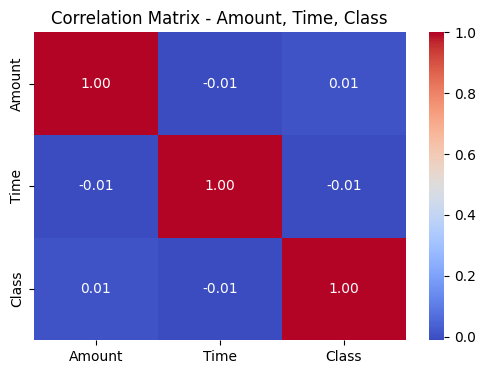

In [17]:
#Perform an in-depth analysis of the dataset to understand the distribution of variables and identify any correlations.
#Explore the relationship between the Amount, Time, and the anonymized features (V1-V28) with the Class label.

#checking distribution of variables
df.hist(figsize=(20, 20))
plt.tight_layout()


# Correlation matrix
corr_matrix = df.corr()
corr_matrix['Amount'].sort_values(ascending=False)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')         
plt.show()


# Relationship between Amount, Time and Class
corr_matrix2 = df[['Amount', 'Time', 'Class']].corr()
corr_matrix2['Amount'].sort_values(ascending=False)

#Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Amount, Time, Class')     
plt.show()




**Observations**:
From the histogram:
The V features (V1-V28) are normaly distributed.
The 'Amount' and 'Class' variables are not normally distributed.

'Amount' has severe outliers and skewness.

The 'Time' variable has a bimodal distribution, which could potentially be due to the fact that the data was collected over a 2-day period.




Low correlation between 'Amount' and 'Time' variables.
Low Correlation between the other features (V1-V28) and the Class label.

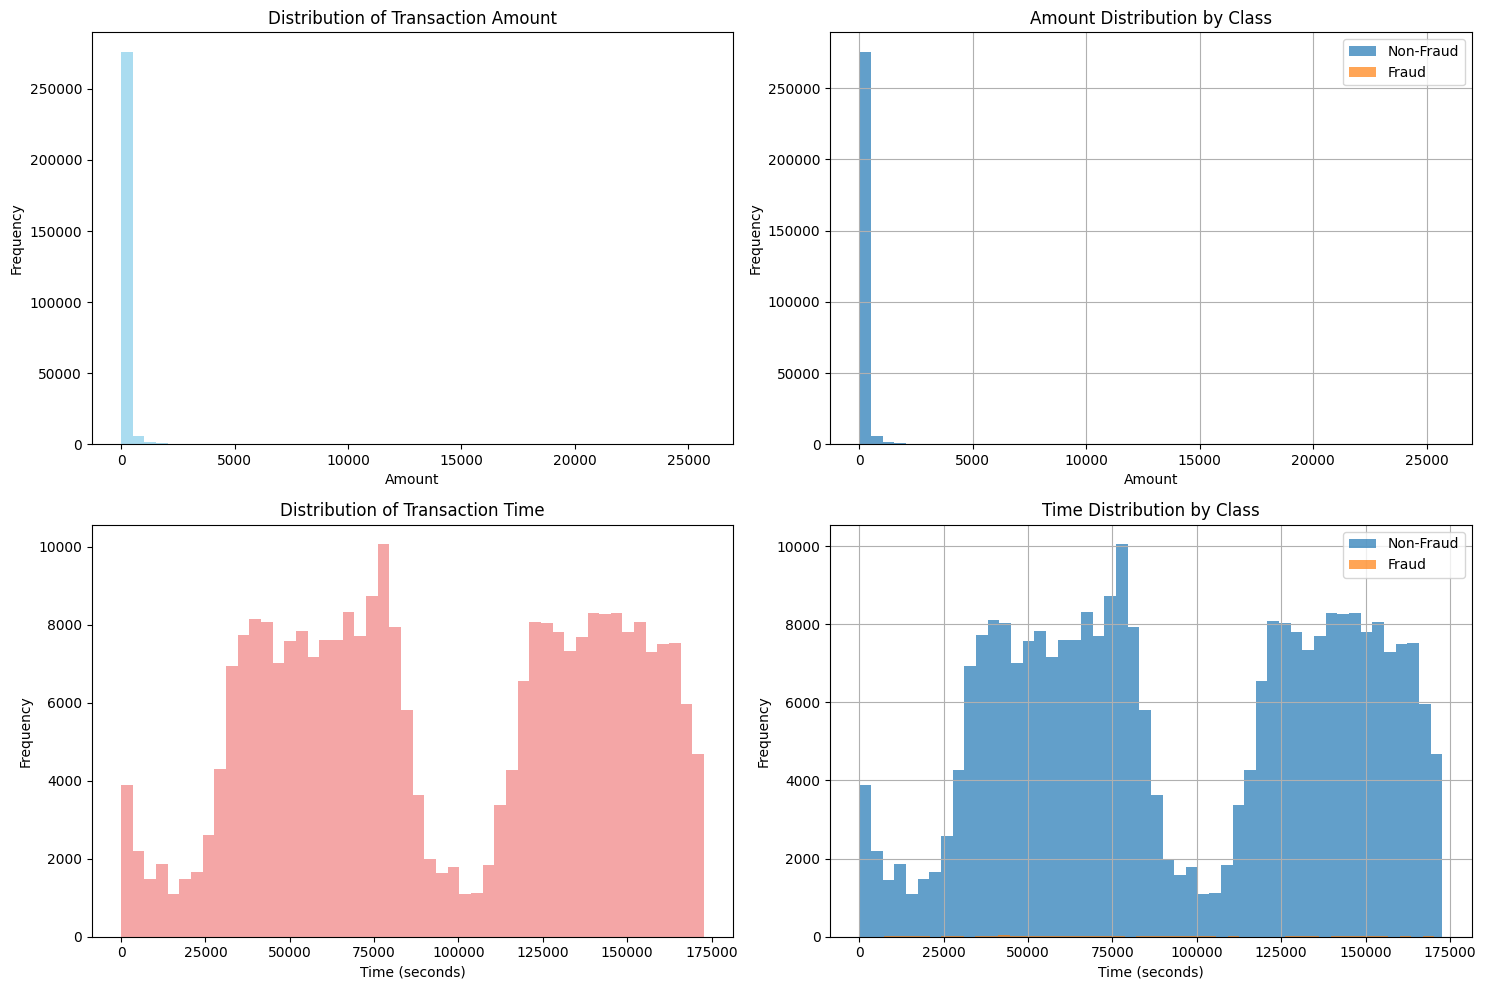

In [18]:
corr_matrix = df.corr()
corr_matrix['Class'].sort_values(ascending=False)


# Distribution of Amount and Time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Amount distribution
axes[0, 0].hist(df['Amount'], bins=50, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Distribution of Transaction Amount')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Frequency')

# Amount distribution by Class
df[df['Class'] == 0]['Amount'].hist(bins=50, alpha=0.7, label='Non-Fraud', ax=axes[0, 1])
df[df['Class'] == 1]['Amount'].hist(bins=50, alpha=0.7, label='Fraud', ax=axes[0, 1])
axes[0, 1].set_title('Amount Distribution by Class')
axes[0, 1].set_xlabel('Amount')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Time distribution
axes[1, 0].hist(df['Time'], bins=50, alpha=0.7, color='lightcoral')
axes[1, 0].set_title('Distribution of Transaction Time')
axes[1, 0].set_xlabel('Time (seconds)')
axes[1, 0].set_ylabel('Frequency')

# Time distribution by Class
df[df['Class'] == 0]['Time'].hist(bins=50, alpha=0.7, label='Non-Fraud', ax=axes[1, 1])
df[df['Class'] == 1]['Time'].hist(bins=50, alpha=0.7, label='Fraud', ax=axes[1, 1])
axes[1, 1].set_title('Time Distribution by Class')
axes[1, 1].set_xlabel('Time (seconds)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

plt.tight_layout()
plt.show()




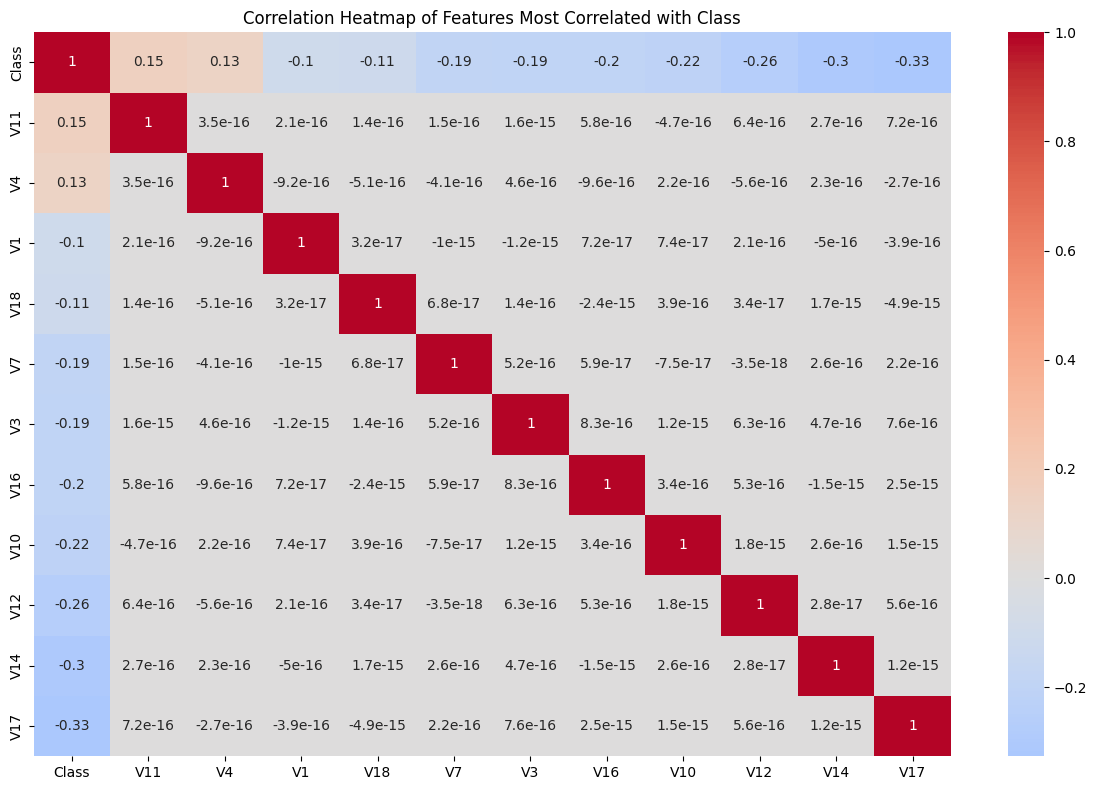

Features most correlated with Class (fraud):
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Features least correlated with Class (fraud):
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


In [19]:
# Correlation heatmap for top correlated features with Class
plt.figure(figsize=(12, 8))
class_corr = df.corr()['Class'].sort_values(ascending=False)
top_features = class_corr[abs(class_corr) > 0.1].index.tolist()

if len(top_features) > 1:
    sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Features Most Correlated with Class')
else:
    # If no features have correlation > 0.1, show top 15 correlated features
    top_15_features = class_corr.head(15).index.tolist()
    sns.heatmap(df[top_15_features].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Top 15 Features')

plt.tight_layout()
plt.show()

print("Features most correlated with Class (fraud):")
print(class_corr.head(10))
print("\nFeatures least correlated with Class (fraud):")
print(class_corr.tail(10))

#The distribution of the Amount and Time variables are heavily skewed, with a large number of outliers.
The distribution of Amount and time seems to be simetric an confirms that it is over a span of 2 days.




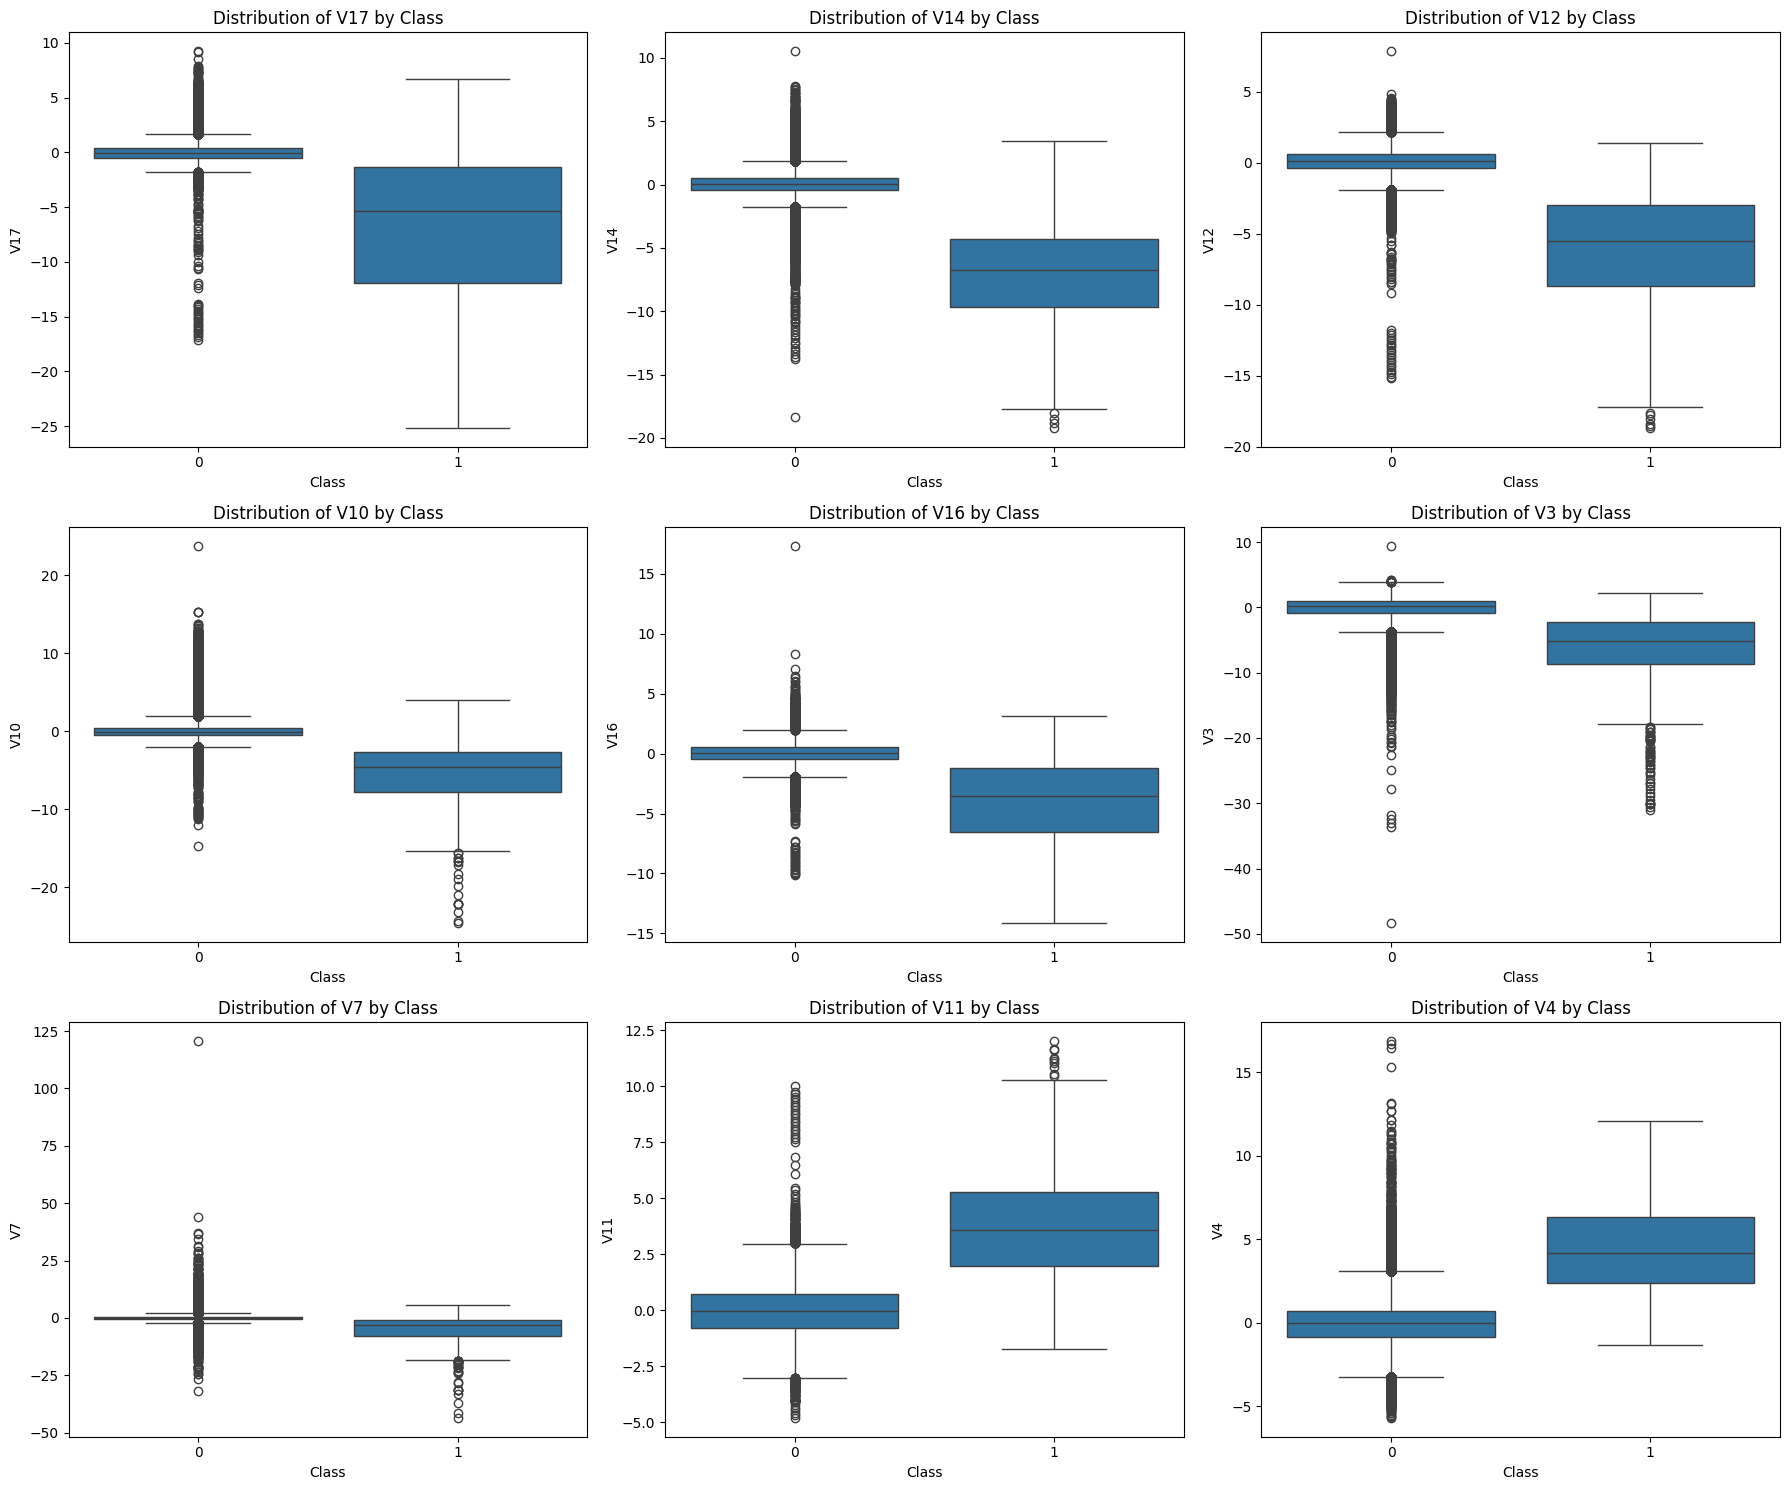

In [20]:
# Box plots for the most important features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# Get top 9 features correlated with Class (excluding Class itself)
top_features = abs(class_corr).sort_values(ascending=False)[1:10].index

for i, feature in enumerate(top_features):
    sns.boxplot(data=df, x='Class', y=feature, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Class')

plt.tight_layout()
plt.show()


Some features have a significant difference in distribution between fraudulent and non-fraudulent transactions. For example, 'V17', 'V14', 'V12', '

#class is highly imbalanced, we wiil choose to use SMOTE to oversample the minority class.

In [21]:
#Feature Engineering

# Create new features based on Amount and Time
df['Amount_log'] = np.log1p(df['Amount'])  # Log transformation to handle skewness
df['Hour'] = (df['Time'] / 3600) % 24  # Extract hour of day
df['Amount_scaled'] = StandardScaler().fit_transform(df[['Amount']])


print("New features:")
print("- Amount_log: Log-transformed amount")
print("- Hour: Hour of the day (0-23)")
print("- Amount_scaled: Standardized amount")

New features:
- Amount_log: Log-transformed amount
- Hour: Hour of the day (0-23)
- Amount_scaled: Standardized amount


In [22]:
df.head() 

# Feature Selection
# Select features most correlated with Class
#heatmap to check correlation of new features (Amount_log, Hour, Amount_scaled) with Class  
corr_matrix = df.corr()
corr_matrix['Class'].sort_values(ascending=False)




Class            1.000000
V11              0.154876
V4               0.133447
V2               0.091289
V21              0.040413
V19              0.034783
V20              0.020090
V8               0.019875
V27              0.017580
V28              0.009536
Amount           0.005632
Amount_scaled    0.005632
V26              0.004455
V25              0.003308
V22              0.000805
V23             -0.002685
V15             -0.004223
V13             -0.004570
V24             -0.007221
Amount_log      -0.008326
Time            -0.012323
Hour            -0.017082
V6              -0.043643
V5              -0.094974
V9              -0.097733
V1              -0.101347
V18             -0.111485
V7              -0.187257
V3              -0.192961
V16             -0.196539
V10             -0.216883
V12             -0.260593
V14             -0.302544
V17             -0.326481
Name: Class, dtype: float64

Correlation between your new features and fraud:
Class            1.000000
Amount           0.005632
Amount_scaled    0.005632
Amount_log      -0.008326
Time            -0.012323
Hour            -0.017082
Name: Class, dtype: float64


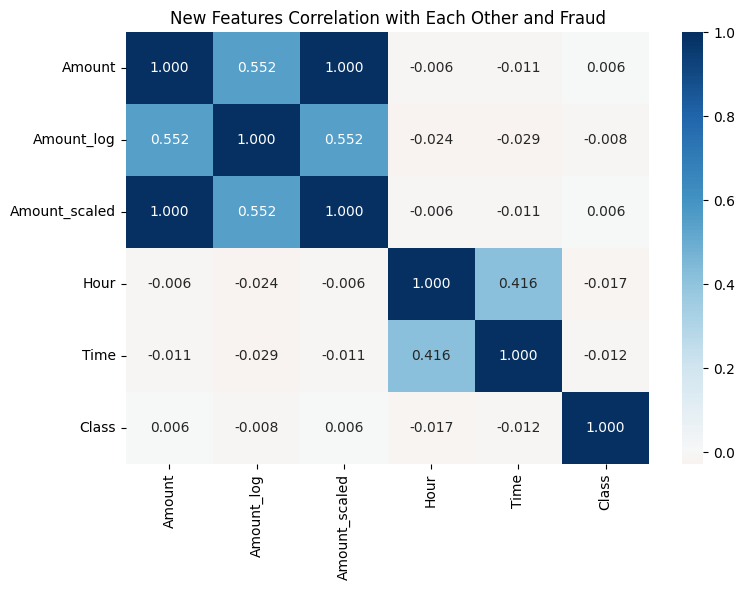

In [23]:
df.columns.tolist()

#check correlation of new features (Amount_log, Hour, Amount_scaled) with Class
corr_matrix = df.corr()
class_correlations = corr_matrix['Class'].sort_values(ascending=False)

new_features = ['Amount', 'Amount_log', 'Amount_scaled', 'Hour', 'Time', 'Class']

# Create a small correlation matrix just for these features
new_corr = df[new_features].corr()
print("Correlation between your new features and fraud:")
print(new_corr['Class'].sort_values(ascending=False))

# Visualize this with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(new_corr, annot=True, cmap='RdBu', center=0, fmt='.3f')
plt.title('New Features Correlation with Each Other and Fraud')
plt.tight_layout()
plt.show()

In [24]:
#feature correlation after feature engineering
corr_matrix = df.corr()


class_correlations = corr_matrix['Class'].sort_values(ascending=False)




# Show the top features that help predict fraud
print(f"\nTop 5 features that help predict fraud:")
top_fraud_predictors = abs(class_correlations).sort_values(ascending=False).head(6)[1:]  # Exclude 'Class' itself
for feature, correlation in top_fraud_predictors.items():
    direction = "increases" if correlation > 0 else "decreases"
    print(f"  {feature}: {correlation:.3f} (fraud likelihood {direction} with this feature)")


Top 5 features that help predict fraud:
  V17: 0.326 (fraud likelihood increases with this feature)
  V14: 0.303 (fraud likelihood increases with this feature)
  V12: 0.261 (fraud likelihood increases with this feature)
  V10: 0.217 (fraud likelihood increases with this feature)
  V16: 0.197 (fraud likelihood increases with this feature)


In [25]:

#Prepare for machine learning step by step
#: Choose which features to use for prediction

# Get all the V features 
v_features = [col for col in df.columns if col.startswith('V')]
print(f"We have {len(v_features)} anonymized features: V1, V2, ..., V28")

# New engineered features
our_new_features = ['Amount_scaled', 'Hour']  # Start simple
print(f"We created {len(our_new_features)} new features: {our_new_features}")

# Combine all features for prediction
all_features = v_features + our_new_features
print(f"Total features for prediction: {len(all_features)}")

We have 28 anonymized features: V1, V2, ..., V28
We created 2 new features: ['Amount_scaled', 'Hour']
Total features for prediction: 30


In [26]:

# Step 2: Prepare the data (X = features, y = Fraud or not)  

X = df[all_features]  # the features
y = df['Class']       # Target variable

print(f"Input data shape: {X.shape} (rows = transactions, columns = features)")
print(f"Output data shape: {y.shape} (each number is 0=normal or 1=fraud)")
print(f"We have {y.sum()} fraudulent transactions out of {len(y)} total")

Input data shape: (284807, 30) (rows = transactions, columns = features)
Output data shape: (284807,) (each number is 0=normal or 1=fraud)
We have 492 fraudulent transactions out of 284807 total


Splitting the data into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42,    # This makes results reproducible
    stratify=y          # keeping the same target ratio in both set
)

print(f"Training set: {X_train.shape[0]} transactions")
print(f"Test set: {X_test.shape[0]} transactions")
print(f"Features: {X_train.shape[1]} features")


# Check if fraud ratio is maintained
print(f"\nFraud percentage in training: {(y_train.sum() / len(y_train) * 100):.2f}%")
print(f"Fraud percentage in test: {(y_test.sum() / len(y_test) * 100):.2f}%")

Training set: 227845 transactions
Test set: 56962 transactions
Features: 30 features

Fraud percentage in training: 0.17%
Fraud percentage in test: 0.17%


Handle imbalanced data using SMOTE (Synthetic Minority Over-sampling Technique)
Applied only to the training set Not to the test set

In [28]:
!pip install imbalanced-learn

#import SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter


  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)


In [29]:

print(f"\nBefore SMOTE - Training data:")
fraud_counts = Counter(y_train)
print(f"Normal transactions: {fraud_counts[0]:,}")
print(f"Fraud transactions: {fraud_counts[1]:,}")
print(f"Fraud percentage: {(fraud_counts[1] / len(y_train) * 100):.2f}%")


Before SMOTE - Training data:
Normal transactions: 227,451
Fraud transactions: 394
Fraud percentage: 0.17%


In [30]:
# Apply SMOTE (only to training data - never to test data!)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"\nAfter SMOTE - Balanced training data:")
balanced_counts = Counter(y_train_balanced)
print(f"Normal transactions: {balanced_counts[0]:,}")
print(f"Fraud transactions: {balanced_counts[1]:,}")
print(f"Fraud percentage: {(balanced_counts[1] / len(y_train_balanced) * 100):.2f}%")


After SMOTE - Balanced training data:
Normal transactions: 227,451
Fraud transactions: 227,451
Fraud percentage: 50.00%


In [31]:
#Training the model using the balanced training set

#starting with random forest  

# Create and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,    # Number of decision trees
    random_state=42,     # For reproducible results
    n_jobs=-1           # Use all CPU cores for faster training
)
rf_model.fit(X_train_balanced, y_train_balanced)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
# Make predictions on test data
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of fraud


In [33]:
#Evaluate results of the model

print("Detailed Performance Report:")
print(classification_report(y_test, y_pred))


# Key metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.3f} ({accuracy*100:.1f}% of predictions were correct)")
print(f"Precision: {precision:.3f} (When model says 'fraud', it's right {precision*100:.1f}% of time)")
print(f"Recall: {recall:.3f} (Model catches {recall*100:.1f}% of actual frauds)")
print(f"F1-Score: {f1:.3f} (Balance between precision and recall)")
print(f"ROC-AUC: {roc_auc:.3f} (Overall model quality - closer to 1.0 is better)")

Detailed Performance Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.85      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.999 (99.9% of predictions were correct)
Precision: 0.856 (When model says 'fraud', it's right 85.6% of time)
Recall: 0.847 (Model catches 84.7% of actual frauds)
F1-Score: 0.851 (Balance between precision and recall)
ROC-AUC: 0.973 (Overall model quality - closer to 1.0 is better)


The model demonstrates strong and reliable performance on the fraud detection task, successfully managing the challenge of extreme class imbalance.

Minimizing False Alarms (Precision): The model achieved a Precision of 86% for the fraud class. This means that when the system flags a transaction as fraud, it is correct 86% of the time. This results in a low rate of false positives (only 14%), which is highly efficient for operational teams who must investigate alerts.

Effective Detection Rate (Recall): Crucially, the model also maintains a high capture rate, identifying 85% of all actual fraud cases (Recall).

Final Result: The system provides an efficient and balanced solution for fraud detection, minimizing unnecessary investigation of legitimate transactions while maintaining a strong ability to catch genuine fraud.

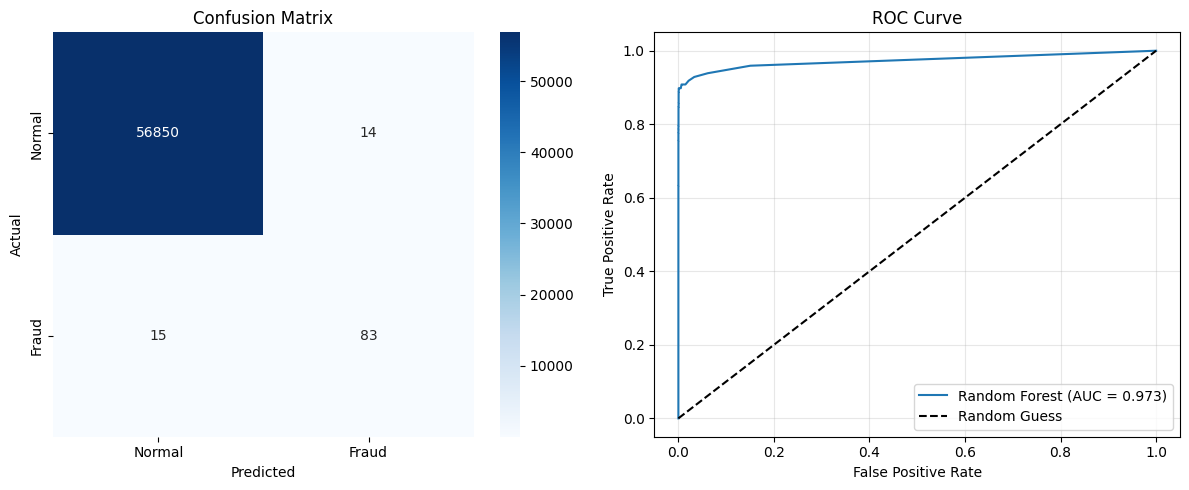

📊 Understanding the Confusion Matrix:
True Negatives (Normal correctly identified): 56,850
False Positives (Normal wrongly flagged as fraud): 14
False Negatives (Fraud missed): 15
True Positives (Fraud correctly caught): 83


In [34]:
#Visualize the Results

# Confusion Matrix
plt.figure(figsize=(12, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')



# Add labels
plt.gca().set_xticklabels(['Normal', 'Fraud'])
plt.gca().set_yticklabels(['Normal', 'Fraud'])

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Explain the confusion matrix
print("📊 Understanding the Confusion Matrix:")
print(f"True Negatives (Normal correctly identified): {cm[0,0]:,}")
print(f"False Positives (Normal wrongly flagged as fraud): {cm[0,1]:,}")
print(f"False Negatives (Fraud missed): {cm[1,0]:,}")
print(f"True Positives (Fraud correctly caught): {cm[1,1]:,}")

***Observation ***
The charts show us how well the finished fraud model works:

Confusion Matrix (The Box of Numbers):

The model was almost perfect at spotting normal transactions (56,850 correct).

It successfully found 83 pieces of fraud.

It made very few mistakes: it only missed 15 actual fraud cases and only gave 14 false alarms (where it called a normal transaction fraud). This is excellent!

ROC Curve (The Line Graph):

The blue line is very high and far away from the random guess line.Participants are expected to submit a comprehensive report detailing their findings, insights, and recommendations. Additionally, a presentation should be prepared to showcase key results and strategies to a panel of judges. An interactive dashboard should be provided to demonstrate the real-time fraud detection capabilities.

The AUC score is 0.973 (almost perfect).

This means the model is extremely good at telling the difference between a normal transaction and a fraudulent one.

--> The model is highly reliable and makes very few mistakes when trying to find the rare fraud cases.

In [35]:
!pip install joblib

In [36]:
import joblib
joblib.dump(rf_model, 'rf_fraud_model.pkl')

['rf_fraud_model.pkl']

In [ ]:
...
